In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


In [2]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11744604,Guardians of Life,2020,3.0
11833768,Neil Cicierega: Wow Wow (Audio),2017,3.0
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN


In [3]:
type(dfMovies)

pandas.core.frame.DataFrame

In [4]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns=['year', 'movie_count']
#dfStatsMovieByYear.set_index('year', inplace=True)
dfStatsMovieByYear

,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
101,2016,15
102,2017,22
103,2018,20
104,2019,28


In [5]:
# le résultat n'est pas fameux
dfStatsMovieByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsMovieByDirector

,0,1
0,"{'birthdate': '1899-08-13', 'name': 'Alfred Hi...",60
1,"{'birthdate': '1942-11-17', 'name': 'Martin Sc...",48
2,"{'birthdate': '1946-12-18', 'name': 'Steven Sp...",41
3,"{'birthdate': '1930-05-31', 'name': 'Clint Eas...",39
4,"{'birthdate': '1940-09-11', 'name': 'Brian De ...",38
5,"{'birthdate': '1937-11-30', 'name': 'Ridley Sc...",35
6,"{'birthdate': '1946-09-22', 'name': 'John Woo'...",34
7,"{'birthdate': '1959-10-23', 'name': 'Sam Raimi...",31
8,"{'birthdate': '1969-10-09', 'name': 'Steve McQ...",31
9,"{'birthdate': None, 'name': 'John Ford', 'id':...",20


In [45]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response

<Response [200]>

In [46]:
if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')

Response OK


In [47]:
data_json = response.json()
data_json

[[{'birthdate': '1899-08-13', 'name': 'Alfred Hitchcock', 'id': 33}, 60],
 [{'birthdate': '1942-11-17', 'name': 'Martin Scorsese', 'id': 217}, 48],
 [{'birthdate': '1946-12-18', 'name': 'Steven Spielberg', 'id': 229}, 41],
 [{'birthdate': '1930-05-31', 'name': 'Clint Eastwood', 'id': 142}, 39],
 [{'birthdate': '1940-09-11', 'name': 'Brian De Palma', 'id': 361}, 38],
 [{'birthdate': '1937-11-30', 'name': 'Ridley Scott', 'id': 631}, 35],
 [{'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247}, 34],
 [{'birthdate': '1959-10-23', 'name': 'Sam Raimi', 'id': 600}, 31],
 [{'birthdate': '1969-10-09', 'name': 'Steve McQueen', 'id': 2588606}, 31],
 [{'birthdate': None, 'name': 'John Ford', 'id': 406}, 20],
 [{'birthdate': '1961-10-31', 'name': 'Peter Jackson', 'id': 1392}, 19],
 [{'birthdate': '1956-10-20', 'name': 'Danny Boyle', 'id': 965}, 18],
 [{'birthdate': None, 'name': 'Walter Edwards', 'id': 250445}, 14],
 [{'birthdate': '1954-08-16', 'name': 'James Cameron', 'id': 116}, 14],
 [{'bi

In [48]:
# applatir en liste de tuples
data_flatten = [ (director_dict['id'], director_dict['name'], director_dict['birthdate'], movie_count )  
         for director_dict, movie_count in data_json ]
data_flatten

[(33, 'Alfred Hitchcock', '1899-08-13', 60),
 (217, 'Martin Scorsese', '1942-11-17', 48),
 (229, 'Steven Spielberg', '1946-12-18', 41),
 (142, 'Clint Eastwood', '1930-05-31', 39),
 (361, 'Brian De Palma', '1940-09-11', 38),
 (631, 'Ridley Scott', '1937-11-30', 35),
 (247, 'John Woo', '1946-09-22', 34),
 (600, 'Sam Raimi', '1959-10-23', 31),
 (2588606, 'Steve McQueen', '1969-10-09', 31),
 (406, 'John Ford', None, 20),
 (1392, 'Peter Jackson', '1961-10-31', 19),
 (965, 'Danny Boyle', '1956-10-20', 18),
 (250445, 'Walter Edwards', None, 14),
 (116, 'James Cameron', '1954-08-16', 14),
 (233, 'Quentin Tarantino', '1963-03-27', 14),
 (102908, 'Robert N. Bradbury', None, 13),
 (634240, 'Christopher Nolan', '1970-07-30', 13),
 (1053, 'Ethan Coen', '1957-09-21', 12),
 (94435, 'Bong Joon Ho', '1969-09-14', 12),
 (1054, 'Joel Coen', '1954-11-29', 11)]

In [49]:
# applatir en list de dicts
data_flatten = [ {**director_dict, 'movie_count': movie_count }  
         for director_dict, movie_count in data_json ]
data_flatten

[{'birthdate': '1899-08-13',
  'name': 'Alfred Hitchcock',
  'id': 33,
  'movie_count': 60},
 {'birthdate': '1942-11-17',
  'name': 'Martin Scorsese',
  'id': 217,
  'movie_count': 48},
 {'birthdate': '1946-12-18',
  'name': 'Steven Spielberg',
  'id': 229,
  'movie_count': 41},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 39},
 {'birthdate': '1940-09-11',
  'name': 'Brian De Palma',
  'id': 361,
  'movie_count': 38},
 {'birthdate': '1937-11-30',
  'name': 'Ridley Scott',
  'id': 631,
  'movie_count': 35},
 {'birthdate': '1946-09-22', 'name': 'John Woo', 'id': 247, 'movie_count': 34},
 {'birthdate': '1959-10-23',
  'name': 'Sam Raimi',
  'id': 600,
  'movie_count': 31},
 {'birthdate': '1969-10-09',
  'name': 'Steve McQueen',
  'id': 2588606,
  'movie_count': 31},
 {'birthdate': None, 'name': 'John Ford', 'id': 406, 'movie_count': 20},
 {'birthdate': '1961-10-31',
  'name': 'Peter Jackson',
  'id': 1392,
  'movie_count': 19},
 {'birthdate': '195

In [50]:
dfStatsMovieByDirector = pd.DataFrame(data_flatten)
dfStatsMovieByDirector.set_index('id', inplace=True)
dfStatsMovieByDirector

,birthdate,name,movie_count
id,,,
33,1899-08-13,Alfred Hitchcock,60
217,1942-11-17,Martin Scorsese,48
229,1946-12-18,Steven Spielberg,41
142,1930-05-31,Clint Eastwood,39
361,1940-09-11,Brian De Palma,38
631,1937-11-30,Ridley Scott,35
247,1946-09-22,John Woo,34
600,1959-10-23,Sam Raimi,31
2588606,1969-10-09,Steve McQueen,31


In [51]:
dfStatsMovieByDirector.loc[33].birthdate

'1899-08-13'

In [52]:
datetime.strptime('1899-08-13', '%Y-%m-%d').date()

datetime.date(1899, 8, 13)

In [53]:
date.fromisoformat('1899-08-13')

AttributeError: type object 'datetime.date' has no attribute 'fromisoformat'

In [54]:
dfStatsMovieByDirector[dfStatsMovieByDirector.birthdate.isnull()]

,birthdate,name,movie_count
id,,,
406,None,John Ford,20
250445,None,Walter Edwards,14
102908,None,Robert N. Bradbury,13


In [55]:
dfStatsMovieByDirector[~dfStatsMovieByDirector.birthdate.isnull()].birthdate.apply(date.fromisoformat)

AttributeError: type object 'datetime.date' has no attribute 'fromisoformat'

In [56]:
# def fromisoformat_or_none(dt):
#    return date.fromisoformat(bd) if bd is not None else None

dfStatsMovieByDirector.birthdate = dfStatsMovieByDirector.birthdate.apply(
    lambda bd: date.fromisoformat(bd) if bd is not None else None)
dfStatsMovieByDirector

AttributeError: type object 'datetime.date' has no attribute 'fromisoformat'

In [57]:
dfStatsMovieByDirector.loc[33].birthdate

'1899-08-13'

In [58]:
# other idea: instead of apply read column birthdate as datetime64 (NaT)
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,NaT
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


## Graphiques avec matplotlib

<AxesSubplot:xlabel='name'>

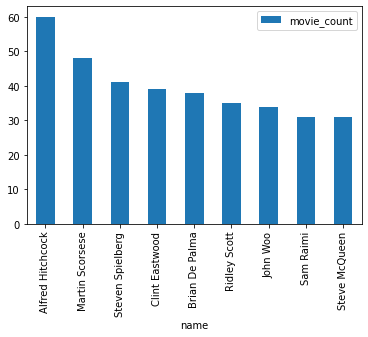

In [59]:
statsToPlot = dfStatsMovieByDirector[dfStatsMovieByDirector.movie_count > 30][['name','movie_count']] \
    .set_index('name')
statsToPlot.plot(kind='bar')

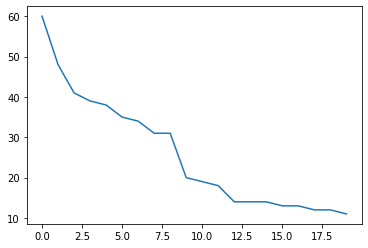

In [60]:
# 1 methode par type de graphe : plot, bar, piechart, ...
movie_count_ndarray = dfStatsMovieByDirector.movie_count.values
plt.plot(movie_count_ndarray)


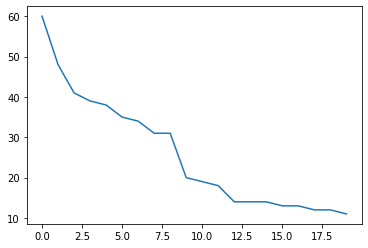

In [61]:
# fig : l'ensemble du dessin
# ax : 1 tracé
fig, ax = plt.subplots()
ax.plot(movie_count_ndarray)

Text(0.5, 1.0, 'diag bar')

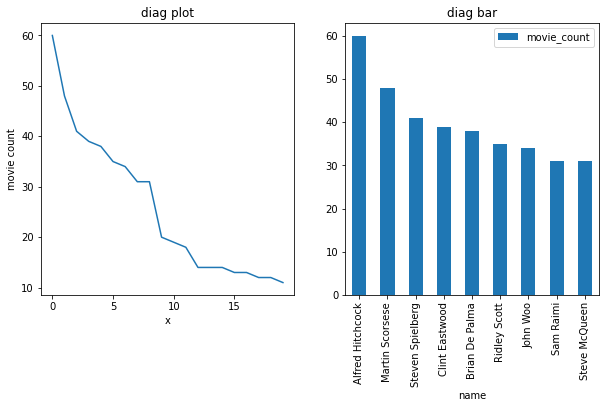

In [62]:
# fig : l'ensemble du dessin
# ax1, ax2 : 2 tracés
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
# NB: fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

# tracé 1 sur ax1
ax1.plot(movie_count_ndarray)
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.set_title('diag plot')
# tracé 2 sur ax2
statsToPlot.plot(kind='bar', ax=ax2)
ax2.set_title('diag bar')


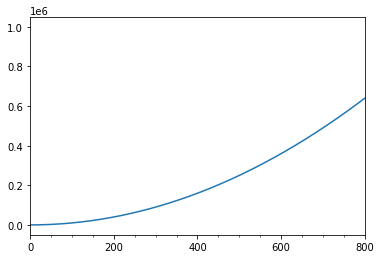

In [63]:
x = np.arange(1000)
y = x**2+1
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0, 800)
# graduation majeure sur l'axe des x (x axis)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
# graduation mineure sur l'axe des x (x axis)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

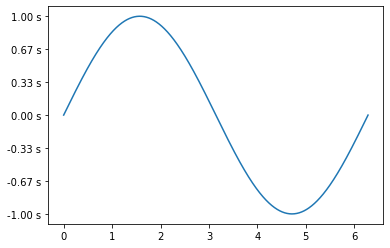

In [64]:
x = np.linspace(0,2*np.pi, 1000)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
# graduation majeure sur l'axe des y (y axis)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
# formattage des labels sur la graduation
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f} s'))
# graduation mineure sur l'axe des y (y axis)
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

In [65]:
# formattage et graduation de datetime, ...
mdates.YearLocator()
mdates.MonthLocator()
mdates.DayLocator()
mdates.DateFormatter('%Y-%m')

In [66]:
#A RENDRE

In [67]:
#DataFrames: count_by_birthday 

In [18]:
dfStarsByYear = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{1950}')
dfStarsByYear

,name,birthdate,id
0,Afemo Omilami,1950-01-01,648416
1,Al Bernstein,1950-01-01,76988
2,Alan Toy,1950-01-01,870257
3,Alex Norton,1950-01-01,636156
4,Andy Cunningham,1950-01-01,192233
...,...,...,...
118,Tony McHale,1950-01-01,570370
119,Tony Papenfuss,1950-01-01,660425
120,Vaughn Armstrong,1950-01-01,35932
121,Vondie Curtis-Hall,1950-01-01,193554


In [19]:
#DataFrames: movies by_title_part

In [20]:
dfMoviesByTitlePart = pd.read_json('http://localhost:8000/movies/by_title_part?t=star')
dfMoviesByTitlePart

,title,year,duration,id
0,Chanel No. 5: La Star,1990,1.0,8317298
1,Seeing Stars,1927,NaN,778043
2,Star in the Dust,1956,80.0,49793
3,Star Wars: Episode IV - A New Hope,1977,121.0,76759
4,Star Wars: Episode IV: A New Hope - Deleted Sc...,2011,8.0,8933914
5,Star Wars: Episode IX - The Rise of Skywalker,2019,142.0,2527338
6,Star Wars: Episode V - The Empire Strikes Back,1980,124.0,80684
7,Star Wars: Episode V - The Empire Strikes Back...,1980,12.0,8924990
8,Star Wars: Episode VI - Return of the Jedi,1983,131.0,86190
9,Star Wars: Episode VI - Return of the Jedi: De...,1983,9.0,8925010


In [21]:
#DataFrames: stats_movie_by_actor

In [22]:
dfStatsMovieByActor = pd.read_json('http://localhost:8000/stars/stats_movie_by_actor')
dfStatsMovieByActor.columns=['Actor', 'movie_count','Année min','Année max']
dfStatsMovieByActor



,Actor,movie_count,Année min,Année max
0,"{'birthdate': '1907-05-26', 'name': 'John Wayn...",172,1926,1976
1,"{'birthdate': '1884-03-16', 'name': 'Harrison ...",86,1915,1932
2,"{'birthdate': '1930-08-25', 'name': 'Sean Conn...",73,1954,2012
3,"{'birthdate': '1946-07-06', 'name': 'Sylvester...",73,1969,2019
4,"{'birthdate': '1956-07-09', 'name': 'Tom Hanks...",69,1980,2020
...,...,...,...,...
161,"{'birthdate': '1959-01-01', 'name': 'Ving Rham...",10,1989,2017
162,"{'birthdate': '1904-01-01', 'name': 'Fred Aldr...",10,1942,1960
163,"{'birthdate': '1924-01-01', 'name': 'Walter Go...",10,1956,1987
164,"{'birthdate': '1898-01-01', 'name': 'Al Taylor...",10,1931,1940


In [23]:
#Répartition par année des films et naissances de star

In [24]:
response = requests.get('http://localhost:8000/movies/count_by_year')
data_json = response.json()
countmovie=[]
datemovie=[]
for i in range (0,len(data_json)):
    countmovie.append(data_json[i][1])
    datemovie.append(data_json[i][0])


response = requests.get('http://localhost:8000/stars/count_by_birthyear')
data_json = response.json()
del data_json[0]
countactor=[]
dateactor=[]
for i in range (0,len(data_json)):
    countactor.append(data_json[i][1])
    dateactor.append(int(data_json[i][0][:4]))

<BarContainer object of 195 artists>

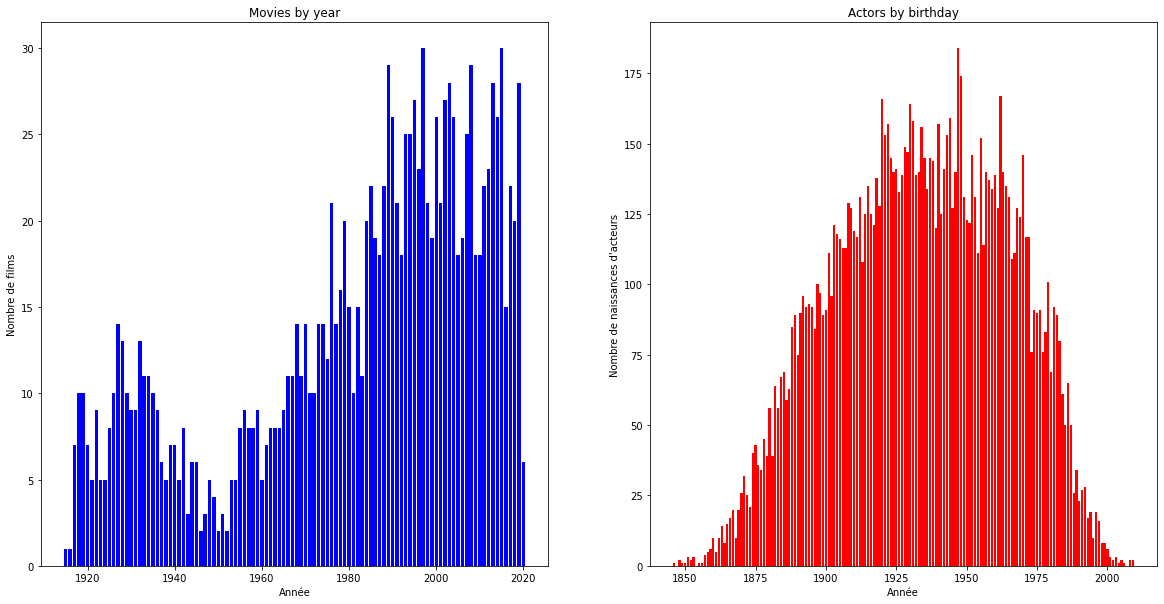

In [13]:
figure = plt.figure(figsize = (20, 10))

axes = figure.add_subplot(1, 2, 1)
axes.set_xlabel("Année")
axes.set_ylabel("Nombre de films")
axes.set_title('Movies by year')
axes.bar(datemovie, countmovie, color = 'blue')
axes = figure.add_subplot(1, 2, 2)
axes.set_xlabel('Année')
axes.set_ylabel("Nombre de naissances d'acteurs")
axes.set_title('Actors by birthday')
axes.bar(dateactor,countactor,  color = 'red')

In [14]:
#Diagramme barres sur la carrière du top 10 acteurs

In [15]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_actor')
data_json = response.json()
countmovie=[]
NomActeur=[]
datemin=[]
datemax=[]
for i in range (0,10):
    countmovie.append(data_json[i][1])
    NomActeur.append(data_json[i][0]['name'])
    datemin.append(data_json[i][2])
    datemax.append(data_json[i][3])

<BarContainer object of 10 artists>

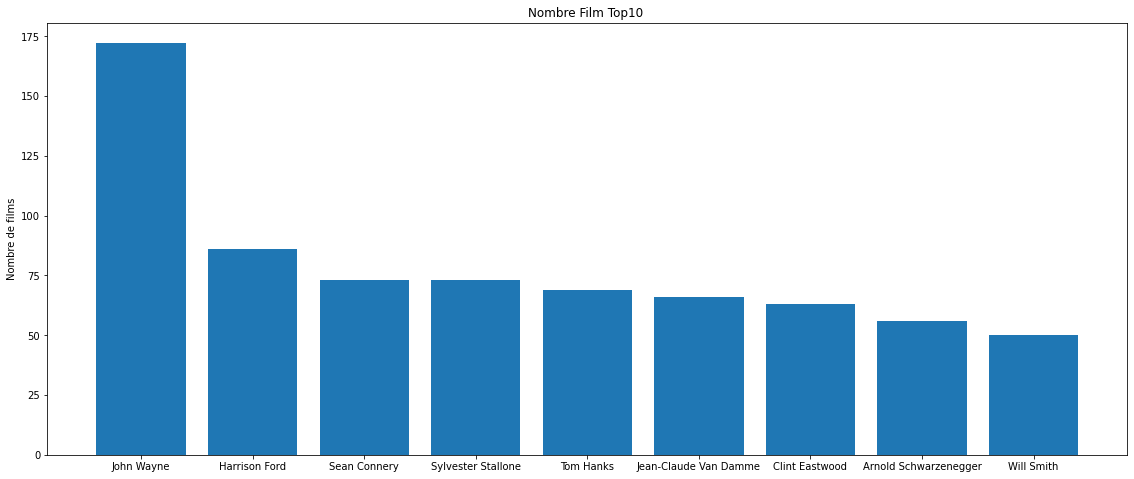

In [16]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Nombre Film Top10 ')
ax.set_ylabel('Nombre de films')
ax.bar(NomActeur,countmovie)

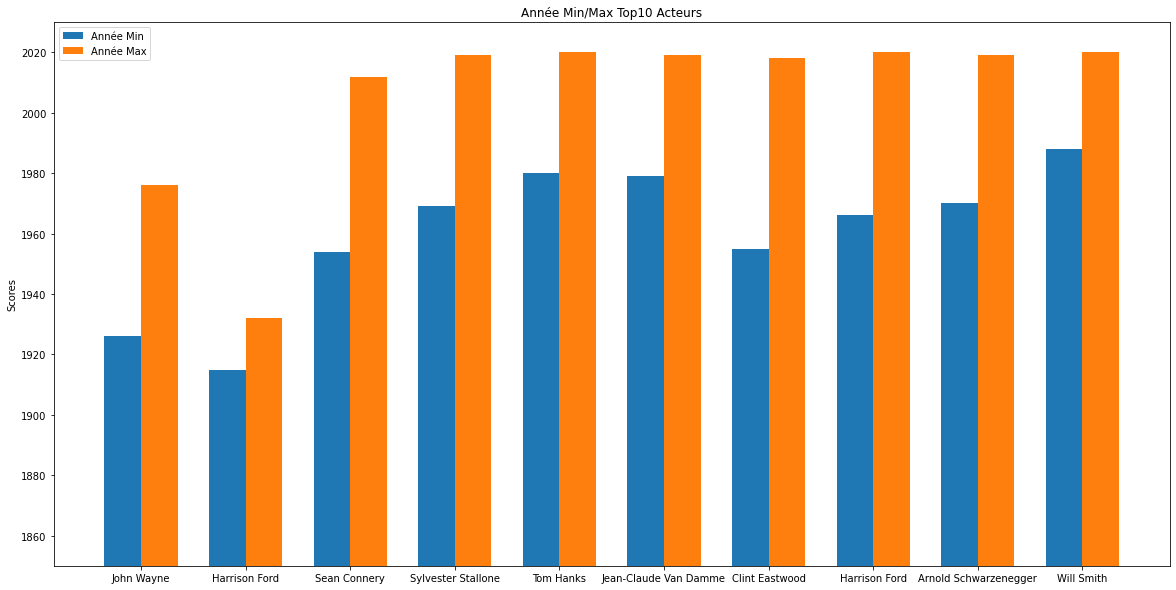

In [25]:
x = np.arange(len(NomActeur))  
width = 0.35 
labels = NomActeur

fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(x - width/2, datemin, width, label='Année Min')
ax.bar(x + width/2, datemax, width, label='Année Max')
ax.set_ylabel('Scores')
ax.set_title('Année Min/Max Top10 Acteurs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(1850,2030)
ax.legend()